# Data Cleaning

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Elimination

In this section we remove entries from both the datasets according to some criteria we define below.

As we noticed in the DU part, there are some cyclists in ```cyclists.csv``` which did not appear in ```races.csv``` i.e. we have a group of cyclists who did not participated to any races.
Since they doon't affect stages statistics we decide to drop them.

In [302]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')
races_df = pd.read_csv('../dataset/races.csv')

In [303]:
# Identify cyclists who did not participate in races
cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())

initial_cyclists_count = len(cyclists_df)

# Remove cyclists who did not participate
cyclists_df = cyclists_df[~cyclists_df['_url'].isin(cyclists_not_in_races)]

removed_cyclists_count = initial_cyclists_count - len(cyclists_df)

print(f"Occurrences of cyclists removed: {removed_cyclists_count}")

Occurrences of cyclists removed: 39


## Cyclists Dataset

### Casting

We force the correct type for the ```cyclists.csv``` dataset attributes.

Before the casting types are:

In [304]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   object 
 1   name         6095 non-null   object 
 2   birth_year   6082 non-null   float64
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   object 
dtypes: float64(3), object(3)
memory usage: 333.3+ KB


We perform the casting:

In [305]:
# Cast _url, name, and nationality to string
cyclists_df['_url'] = cyclists_df['_url'].astype("string")
cyclists_df['name'] = cyclists_df['name'].astype("string")
cyclists_df['nationality'] = cyclists_df['nationality'].astype("string")

In [306]:
# Cast birth_year to int (more easy to manipulate)
cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')

Check if the types are now correct:

In [307]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6095 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   string 
 1   name         6095 non-null   string 
 2   birth_year   6082 non-null   Int64  
 3   weight       3062 non-null   float64
 4   height       3127 non-null   float64
 5   nationality  6094 non-null   string 
dtypes: Int64(1), float64(2), string(3)
memory usage: 339.3 KB


### Null Values

Below we plot the heatmap of the null values in the cyclists dataset. TODO: move to DU

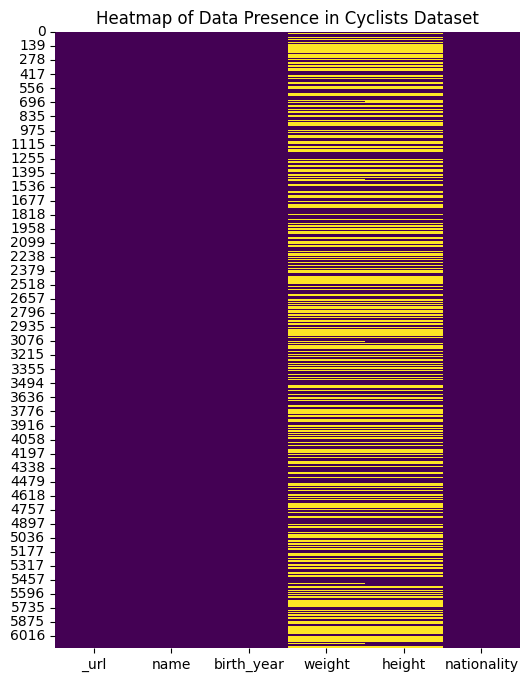

In [308]:
# Heatmap of the presence of data in the cyclists_df dataset
plt.figure(figsize=(6, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Cyclists Dataset')
plt.show()

Now we manage the null values in each column of the cyclists dataset.

#### ```birth_year``` column

In [309]:
cyclists_df[cyclists_df['birth_year'].isnull()]


,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,<NA>,NaN,NaN,<NA>
601,vladimir-malakov,Vladimir Malakov,<NA>,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,<NA>,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,<NA>,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,<NA>,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,<NA>,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,<NA>,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,<NA>,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,<NA>,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,<NA>,NaN,NaN,Spain


As there are very few entries, we impute the missing values for the birthday by doing an online search (see the report for the complete list of sources used).

In [310]:
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'birth_year'] = 1995
cyclists_df.loc[cyclists_df['_url'] == 'vladimir-malakov', 'birth_year'] = 1958
cyclists_df.loc[cyclists_df['_url'] == 'antonio-zanini', 'birth_year'] = 1965

To impute the ```birth_year``` value of ```javier-luqin``` we looked up the website procyclingstats.com retrieving the following race(s) in which he participated according to the ```races.csv``` dataset.

In [311]:
races_df[races_df['cyclist'] == 'javier-luquin']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
303965,giro-d-italia/1992/stage-19,Giro d'Italia,80.0,NaN,201000.0,NaN,NaN,953,NaN,1992-06-12 06:08:37,74,javier-luquin,NaN,True,False,False,NaN,966.0


Then, we retrieve the card of ```javier-luquin``` to obtain his birthday. However, we noticed that Giro d'Italia '92 was participated by Luis Javier Lukin and not Luquin. We checked also ```cyclists.csv``` by noticing that Luis Javier Lukin is present and he also has some races entries in ```races.csv``` which are the same reported in the webpage. We conclude that there is a mistake in the cyclist indentifier.

We then change the cyclist identifier in ```races.csv``` and delete the wrong record in ```cyclists.csv```.

In [312]:
# Drop the row with the URL 'javier-luquin'
cyclists_df.drop(cyclists_df[cyclists_df['_url'] == 'javier-luquin'].index, inplace=True)

# Verify the row has been dropped
(cyclists_df[cyclists_df['_url'] == 'javier-luquin'])

,_url,name,birth_year,weight,height,nationality


In [313]:
# We check how many occurrences of 'javier-luquin' and 'javier-lukin' are in the races dataset before manipulating the data
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 1
Occurrences of 'javier-lukin': 101


In [314]:
# Replace 'javier-luquin' with 'javier-lukin' in the cyclist column
races_df['cyclist'] = races_df['cyclist'].replace('javier-luquin', 'javier-lukin')

# Verify the replacement has been made successfully
luquin_count = races_df[races_df['cyclist'] == 'javier-luquin'].shape[0]
lukin_count = races_df[races_df['cyclist'] == 'javier-lukin'].shape[0]

print(f"Occurrences of 'javier-luquin': {luquin_count}")
print(f"Occurrences of 'javier-lukin': {lukin_count}")

Occurrences of 'javier-luquin': 0
Occurrences of 'javier-lukin': 102


The remaining cyclists participated only in one race for each, so their weight on the overall data is minimal. For this reason, we decided to impute their birth year using a simple approach: we calculate the average debut age of the cyclists according to our data and subtract it from the first stage date of cyclists with missing age values to obtain an approximate birth year.

In [315]:
# We create a temporary column to store the year of the races
races_df['race_date'] = pd.to_datetime(races_df['date']).dt.year

# Calculate the debut year for each cyclist excluding the ones with missing birth year
valid_cyclists = cyclists_df[cyclists_df['birth_year'].notnull()]
min_race_date_per_cyclist = races_df.groupby('cyclist')['race_date'].min()
debut_age_per_cyclist = min_race_date_per_cyclist - valid_cyclists.set_index('_url')['birth_year']

# Calculate the average debut year
average_debut_age = int(debut_age_per_cyclist.mean())
print(f"Average debut year: {average_debut_age}")

# Drop race_date added column, not needed anymore
races_df.drop(columns=['race_date'], inplace=True)

Average debut year: 24


Now we calculated the average debut age of the cyclists in the dataset, we can impute the missing values in the ```birth_year``` column.

In [316]:
cyclists = [
    'filippo-simonetti',
    'carlos-garcia',
    'alexandr-osipov',
    'nicolai-kosyakov',
    'nevens-guy',
    'oscar-pumar',
    'thierry-lauder',
    'sergei-jermachenko',
    'batik-odriozola'
]

for cyclist in cyclists:
    # Get the oldest race date for the cyclist
    oldest_race_date = pd.to_datetime(races_df[races_df['cyclist'] == cyclist]['date']).min()
    
    # Calculate the birth year by subtracting the average debut age from the oldest race year
    birth_year = oldest_race_date.year - average_debut_age
    
    # Update the birth year in the cyclists_df DataFrame
    cyclists_df.loc[cyclists_df['_url'] == cyclist, 'birth_year'] = birth_year

# Verify the birth years have been updated
cyclists_df[cyclists_df['_url'].isin(cyclists)]

,_url,name,birth_year,weight,height,nationality
2408,filippo-simonetti,Filippo Simonetti,1973,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,1977,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,1961,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,1961,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,1969,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,1971,NaN,NaN,Venezuela
4756,thierry-lauder,Thierry Lauder,1976,NaN,NaN,France
6072,sergei-jermachenko,Sergei Jermachenko,1961,NaN,NaN,Russia
6080,batik-odriozola,Batik Odriozola,1973,NaN,NaN,Spain


Now we merge the updated information with the dataset.

In [317]:
# Merge races_df with cyclists_df to get the birth year of each cyclist
merged_df = races_df.merge(cyclists_df[['birth_year', '_url']], left_on='cyclist', right_on='_url', how='left')

# Calculate the age by subtracting the birth year from the race year
merged_df['calculated_age'] = pd.to_datetime(merged_df['date']).dt.year - merged_df['birth_year']

# Update the missing ages in races_df with the calculated ages
races_df['cyclist_age'] = races_df['cyclist_age'].combine_first(merged_df['calculated_age'])

In [318]:
# Dumb check to see if the birth year has been updated
races_df[races_df['cyclist'] == 'filippo-simonetti']

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
27825,la-fleche-wallone/1997/result,La Flèche Wallonne,225.0,NaN,200500.0,NaN,NaN,1090,NaN,1997-04-16 05:07:05,57,filippo-simonetti,24.0,False,False,False,NaN,5.0


#### ```weight```, ```weight``` columns

Since ```weight``` and ```height``` columns have ~50% of null values we decide to not consider the two column for the general analysis. We reserve the right to reuse them for anthropometric/morphological analyses (in that case we will keep only rows for which we have the values).

In [319]:
# Calculate the percentage of null values in the weight and height columns
weight_null_percentage = cyclists_df['weight'].isnull().sum() / len(cyclists_df) * 100
height_null_percentage = cyclists_df['height'].isnull().sum() / len(cyclists_df) * 100

print(f"Percentage of null values in weight column: {weight_null_percentage:.2f}%")
print(f"Percentage of null values in height column: {height_null_percentage:.2f}%")

Percentage of null values in weight column: 49.75%
Percentage of null values in height column: 48.69%


#### ```nationality``` column column

Now we impute the only null value for nationality which is the one associated to Scott Davies, who's from Great Britain.

In [320]:
cyclists_df[cyclists_df['nationality'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,1995,NaN,NaN,<NA>


In [321]:
# Set Great Britain as the nationality for the cyclist 'scott-davies'
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', 'nationality'] = 'Great Britain'

# Verify
cyclists_df[cyclists_df['_url'] == 'scott-davies']

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,1995,NaN,NaN,Great Britain


## Races Dataset

### Duplicate removal

All rows that have  duplicate cyclists for the same ```_url``` and are removed. We drop both the duplicates since we don't know which one is the correct one.

In [322]:
# Group by '_url' and filter out rows where 'cyclist' is duplicated within each group
initial_row_count = races_df.shape[0]
races_df = races_df[~races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

dropped_rows = initial_row_count - races_df.shape[0]
print(f"Number of dropped rows: {dropped_rows}")

Number of dropped rows: 249


### Per column cleaning

#### ```points``` column

In [323]:
int(races_df['points'].isnull().sum())

477

We show which races have missing points.

In [324]:
races_df[races_df['points'].isnull()]['_url'].value_counts()

_url
vuelta-a-espana/1994/stage-5    165
tour-de-france/2019/stage-19    155
tour-de-france/1986/stage-19    135
tour-de-france/1988/prologue     22
Name: count, dtype: int64

We can notice that only four stages do not have points information. So we decide to impute missing values usign a segmentation approach: we compute the median value of that particular stage across the years.

In [325]:
null_urls = ['vuelta-a-espana/1994/stage-5', 'tour-de-france/2019/stage-19', 'tour-de-france/1986/stage-19', 'tour-de-france/1988/prologue']

for url in null_urls:
    # split the url by '/'
    url_parts = url.split('/')
    # find the urls with the same first and third parts excluding the second part
    matching_urls = races_df['_url'].apply(lambda x: x.split('/')).apply(lambda x: x[0] == url_parts[0] and x[2] == url_parts[2] and x[1] != url_parts[1])
    # calculate the median points for the matching urls
    median = races_df[matching_urls]['points'].median()
    # update the null values with the median
    races_df.loc[races_df['_url'] == url, 'points'] = races_df.loc[races_df['_url'] == url, 'points'].fillna(median)
    
# Verify the null values have been updated
int(races_df['points'].isnull().sum())

0

#### ```uci_points``` column

As they have a lot of missing values and we have points infomation, we decide to drop this column.

In [326]:
races_df.drop(columns=['uci_points'], inplace=True)

#### ```climb_total``` column

Since too many stages have null values to be imputed, we decide to drop the rows with null values. In fact, despite the null values are "only" 146908, impuing the values would lead to a complete alteration of the distribution of a specific race, since the null values issue regards almost the half of the stages.

In [327]:
races_df['_url'].nunique()

5281

In [328]:
races_df[races_df['climb_total'].isnull()]['_url'].value_counts().sum()

np.int64(146908)

In [329]:
races_df[races_df['climb_total'].isnull()]['_url'].value_counts()

_url
milano-sanremo/1992/result        203
tour-de-france/1987/stage-3       202
tirreno-adriatico/2006/stage-1    197
giro-d-italia/1995/stage-3        195
volta-a-catalunya/2007/stage-2    195
                                 ... 
tour-de-suisse/1972/stage-7         1
tour-de-suisse/1972/stage-8a        1
il-lombardia/1972/result            1
tour-de-suisse/1972/stage-6b        1
tour-de-suisse/1972/stage-2         1
Name: count, Length: 2214, dtype: int64

Drop the rows with null values.

In [330]:
# Drop rows where climb_total is null
races_df.dropna(subset=['climb_total'], inplace=True)

# Verify
print(f"Remaining rows after dropping rows with null climb_total: {races_df.shape[0]}")

Remaining rows after dropping rows with null climb_total: 442708


#### ```average_temperature``` column

Since we have few known values, we decide to drop the column.

In [332]:
races_df.drop(columns=['average_temperature'], inplace=True)
print(f"Remaining columns after dropping 'average_temperature':")
print(races_df.columns)

Remaining columns after dropping 'average_temperature':
Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'is_cobbled', 'is_gravel', 'cyclist_team', 'delta'],
      dtype='object')


#### ```delta``` column

Since the delta column contains some negative values which are not admissible and, more in general, the column is not useful for our analysis, we decide to drop it.

In [333]:
races_df.drop(columns=['delta'], inplace=True)
races_df.columns

Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'is_cobbled', 'is_gravel', 'cyclist_team'],
      dtype='object')

#### ```is_cobbled```, ```is_gravel``` columns

Since all the values are False so they are not informative, we decide to drop the columns.

In [334]:
races_df.drop(columns=['is_cobbled', 'is_gravel'], inplace=True)
print(f"Remaining columns after dropping 'average_temperature':")
print(races_df.columns)

Remaining columns after dropping 'average_temperature':
Index(['_url', 'name', 'points', 'length', 'climb_total', 'profile',
       'startlist_quality', 'date', 'position', 'cyclist', 'cyclist_age',
       'is_tarmac', 'cyclist_team'],
      dtype='object')


## TODO: move to DU

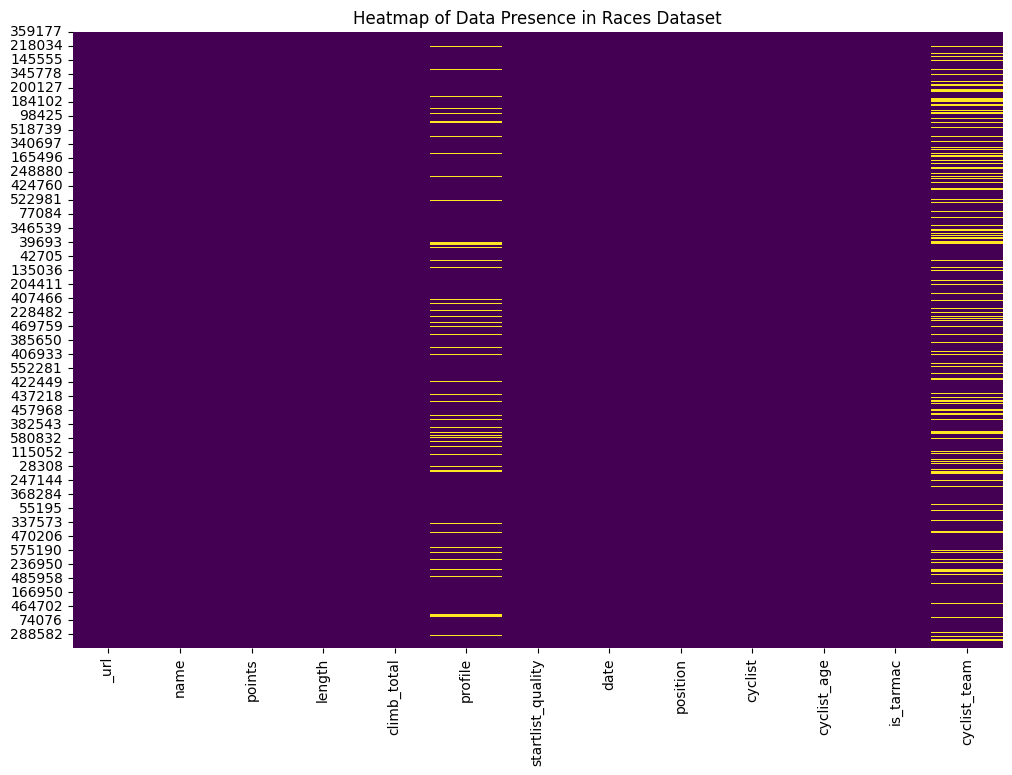

In [335]:
# Visualize a heatmap of the presence of data in the races_df dataset
plt.figure(figsize=(12, 8))

# Sample a subset of the data to avoid memory issues
sampled_races_df = races_df.sample(frac=0.1, random_state=1)

sns.heatmap(sampled_races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Data Presence in Races Dataset')
plt.show()

### **OBS:**
we should check the question of deltas and dates, if indeed all deltas can be derived from deltas (which seem to represent the duration of the race) then we can discard deltas. (deltas are the differences in the dates) 